# Bank Customer Churn Analysis
Esse projeto tem como objetivo fazer uma predição sobre a probabilidade de um cliente 
cancelar sua conta no banco. 
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
### Problema de Negócio: Churn Rate
- Qual é o problema de negócio?
    - O estado de Churn está associado ao modelo de negócio de cada empresa. Basicamente se refere a quantidade de pessoas que não utilizam mais os serviços ou compram produtos de uma empresa por um determinado tempo.
    - A análise de Churn é calculada pela quantidade de pessoas em Churn sobre o total de clientes da empresa multiplicado por 100 para obter o valor da taxa. 
- Qual obejtivo e benefício dessa análise? 
    - A realização dessa análise busca satisfazer alguns passos: 
    1. Identificar qual é a taxa de churn presente no banco de dados;
    2. Identificar quais variáveis tem mais correlação com a saída dos clientes; 
    3. Desenvolver um modelo que predição de churn. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# visualisação dos dados 
dataset = pd.read_csv('Customer-Churn-Records.csv')
display(dataset)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
dataset.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
dataset.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## EAD | VISUALIZAÇÃO DE DADOS EM GRÁFICOS 

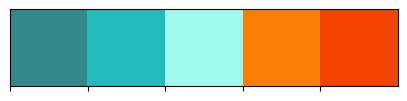

In [6]:
color_palette = ['#348888', '#22BABB', '#9EF8EE', '#FA7F08', '#F24405']
sns.set_palette(sns.color_palette(color_palette))
sns.palplot(sns.color_palette(color_palette))

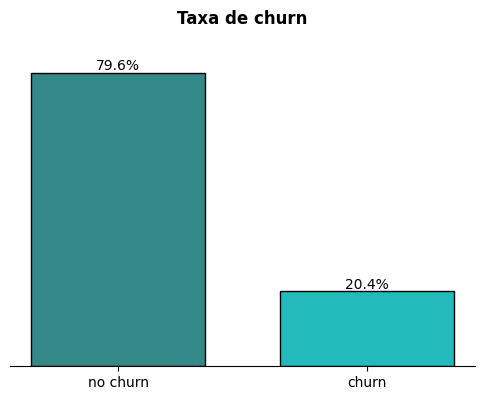

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

default_grouped = dataset.groupby(['Exited'])[['Exited']].count().rename(columns={'Exited': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

Grafbars = ax.bar(x=default_grouped['Exited'], height=default_grouped['pct'], 
                  color=color_palette, edgecolor = 'black', width=0.7)
for bar, pct in zip(Grafbars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('Taxa de churn', pad=25, fontweight='bold')
ax.set_xticks(ticks=default_grouped['Exited'], labels=['no churn', 'churn'])
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

In [8]:
round(dataset['Exited'].value_counts(normalize=True)*100,2)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

Com as informações obtidas na base de dados, é consideravel afirmar que a taxa de churn está com um nível elevado.  

A quantidade de clientes em estado de Churn pode ser calculada por: 

> **NÚMERO TOTAL DE CLIENTES** X **TAXA DE CHURN** = 2.380 clientes

Esses números pode se tornar um problema, então compreender a causa torna-se 
necessário. 



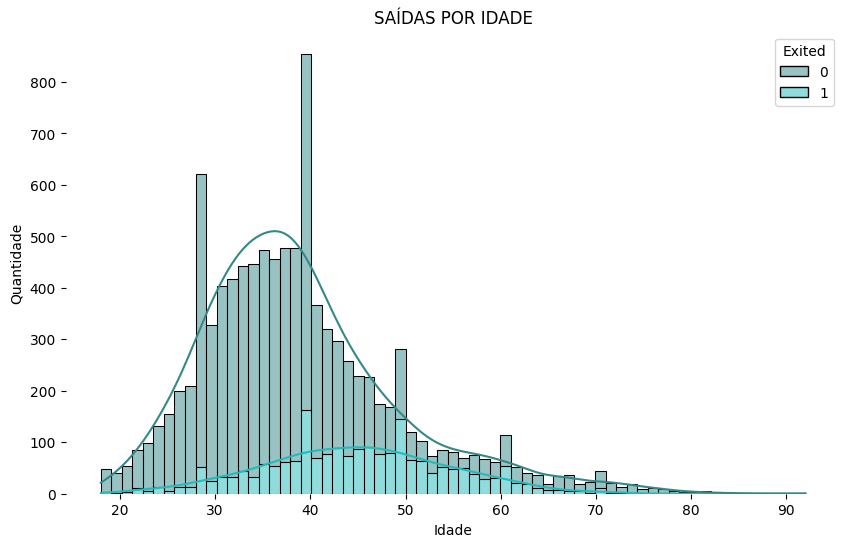

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Age', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('SAÍDAS POR IDADE')
plt.show()

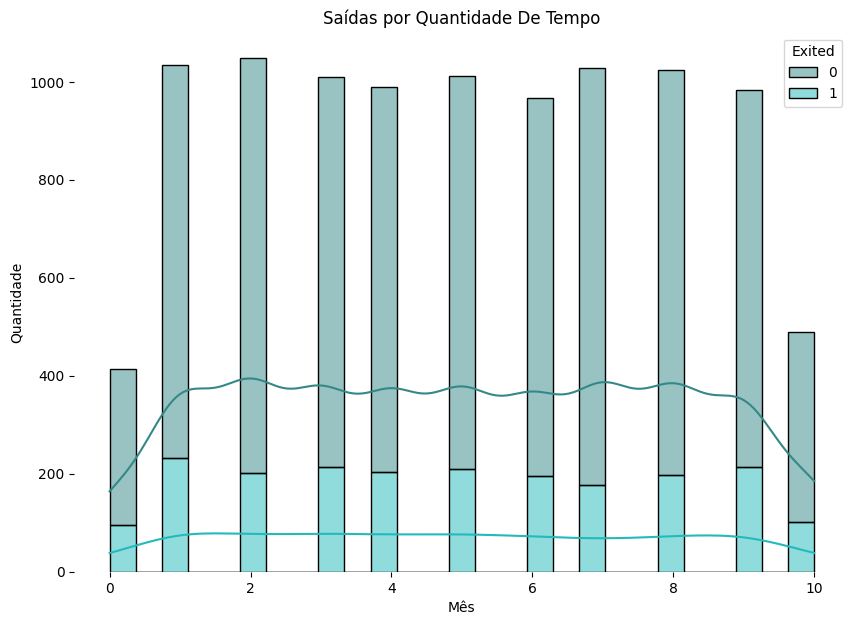

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Tenure', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Saídas por Quantidade De Tempo' )
plt.show()

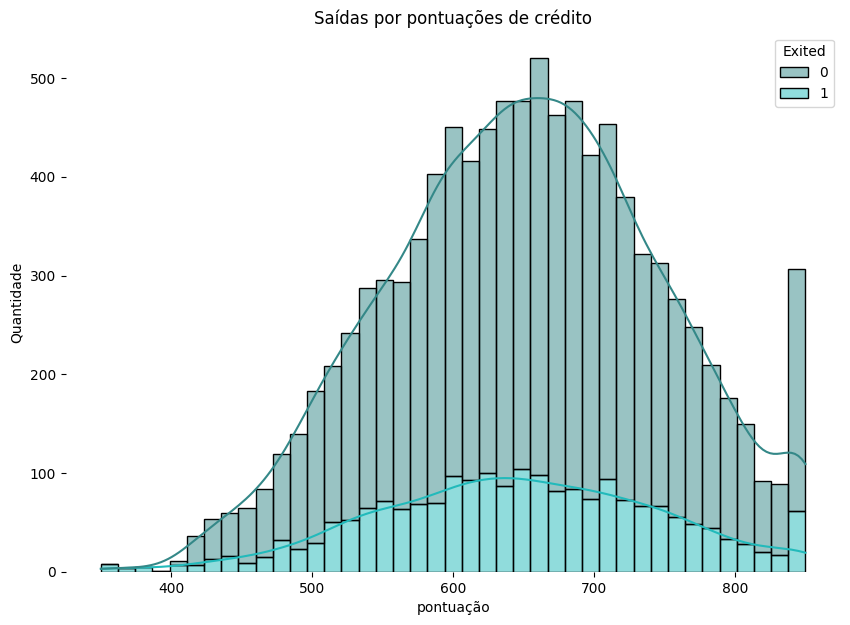

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'CreditScore', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('pontuação')
plt.ylabel('Quantidade')
plt.title('Saídas por pontuações de crédito')
plt.show()

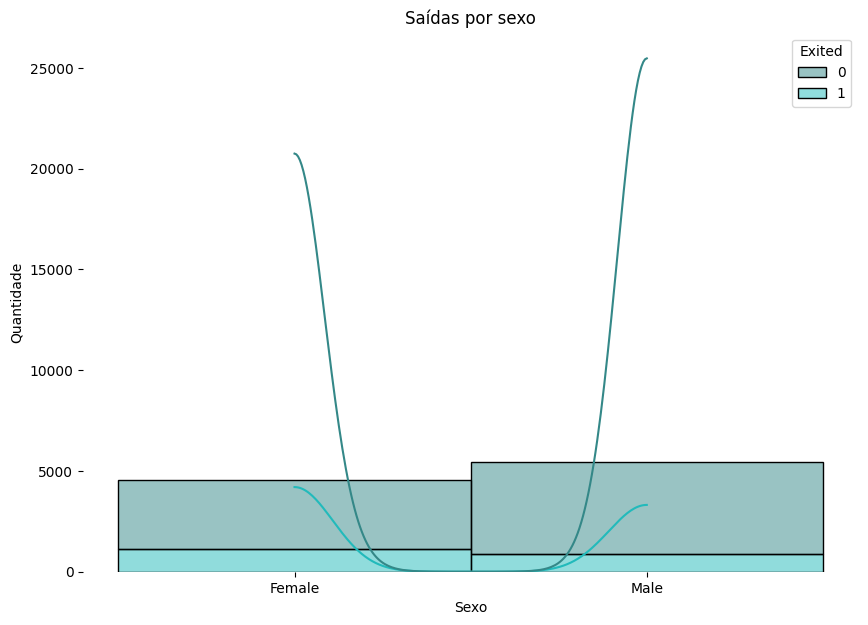

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Gender', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Saídas por sexo')
plt.show()

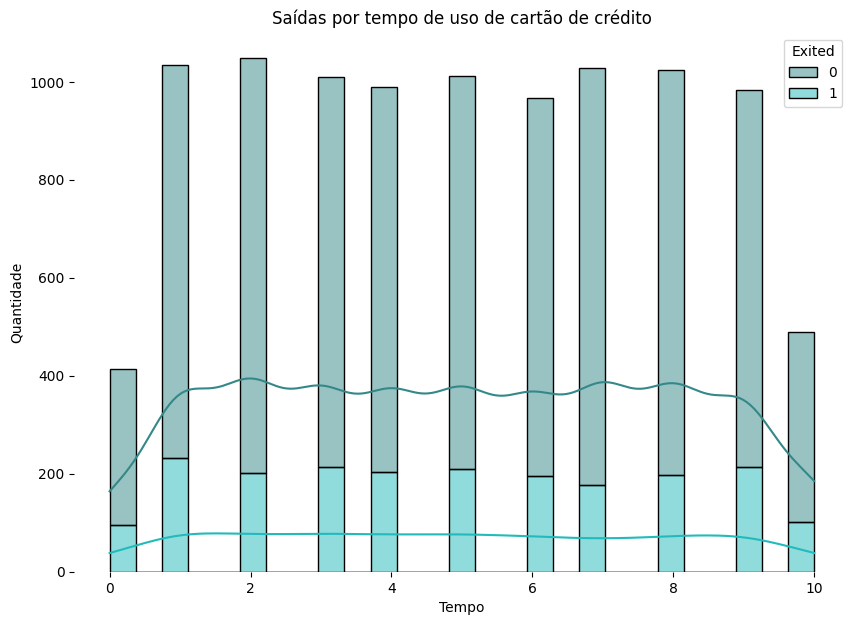

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Tenure', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title('Saídas por tempo de uso de cartão de crédito')
plt.show()

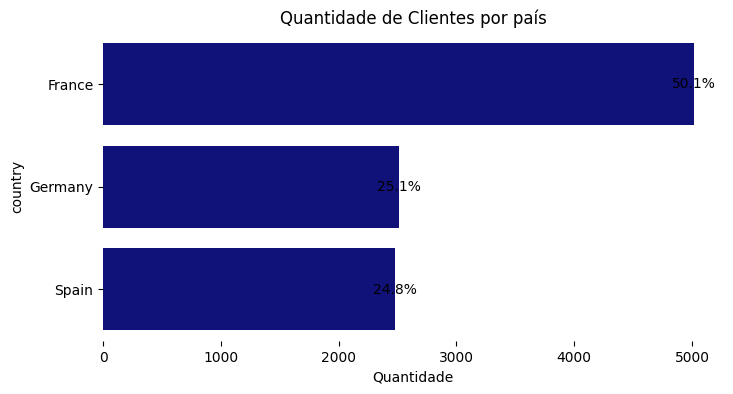

In [14]:
quant = dataset['Geography'].value_counts().reset_index()
quant.columns = ['Geography', 'quantidade']


fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(quant, x='quantidade',y='Geography', color='darkblue', legend=False)
for p in ax.patches:
    width = p.get_width()
    plot.text(width, 
            p.get_y() + p.get_height() / 2,
            f'{width / quant["quantidade"].sum() * 100:.1f}%',  # Porcentagem com uma casa decimal
            ha='center', va='center', color = 'black')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('country')
plt.title('Quantidade de Clientes por país')
plt.show()

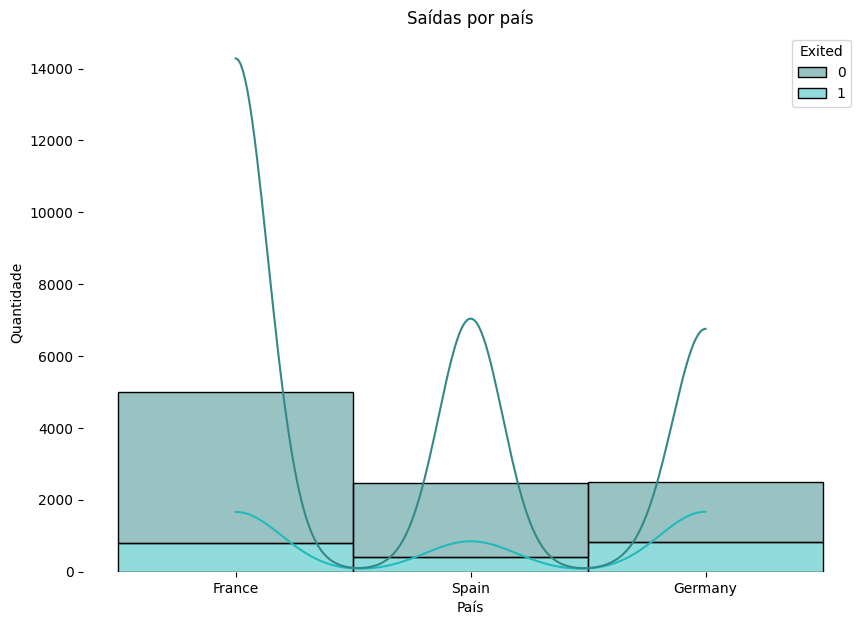

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Geography', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('País')
plt.ylabel('Quantidade')
plt.title('Saídas por país')
plt.show()

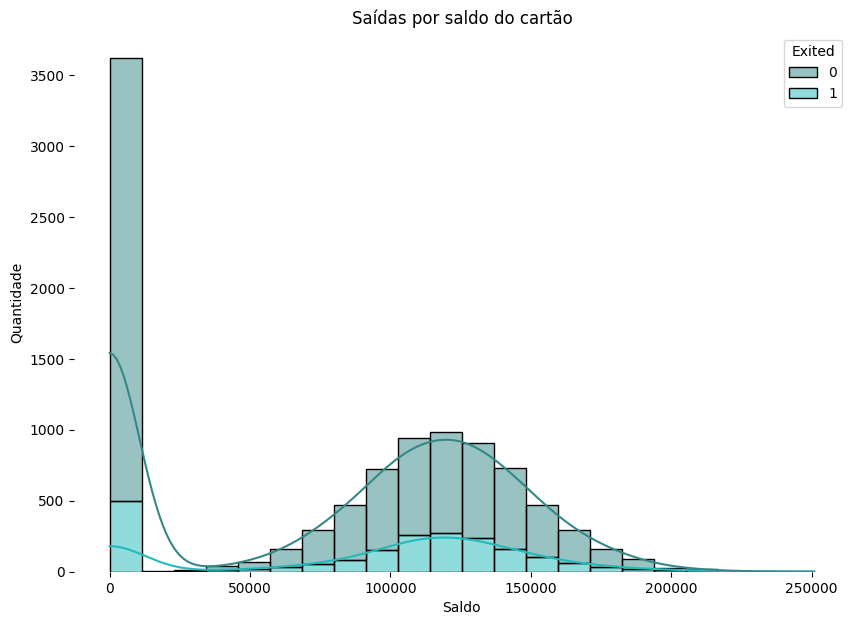

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Balance', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Saldo')
plt.ylabel('Quantidade')
plt.title('Saídas por saldo do cartão')
plt.show()

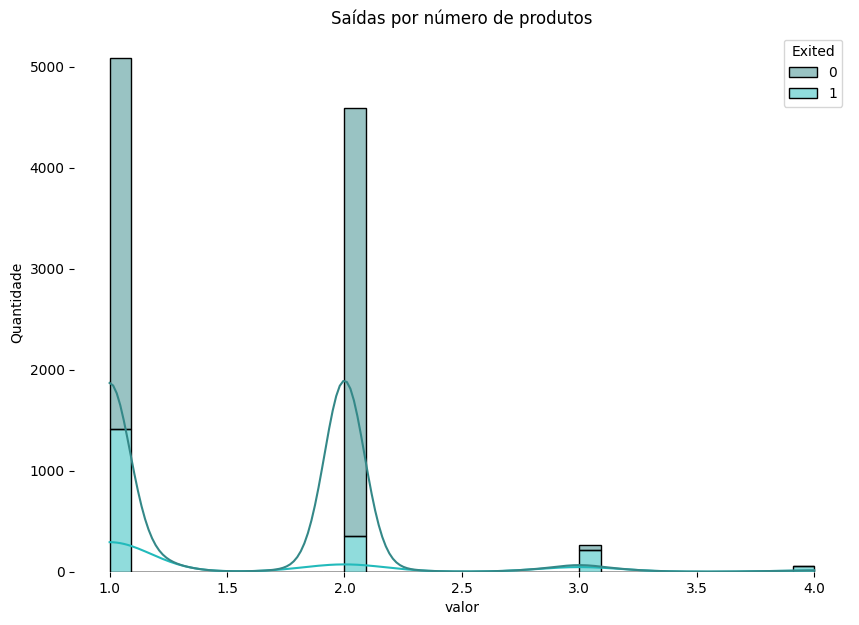

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'NumOfProducts', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('valor')
plt.ylabel('Quantidade')
plt.title('Saídas por número de produtos')
plt.show()

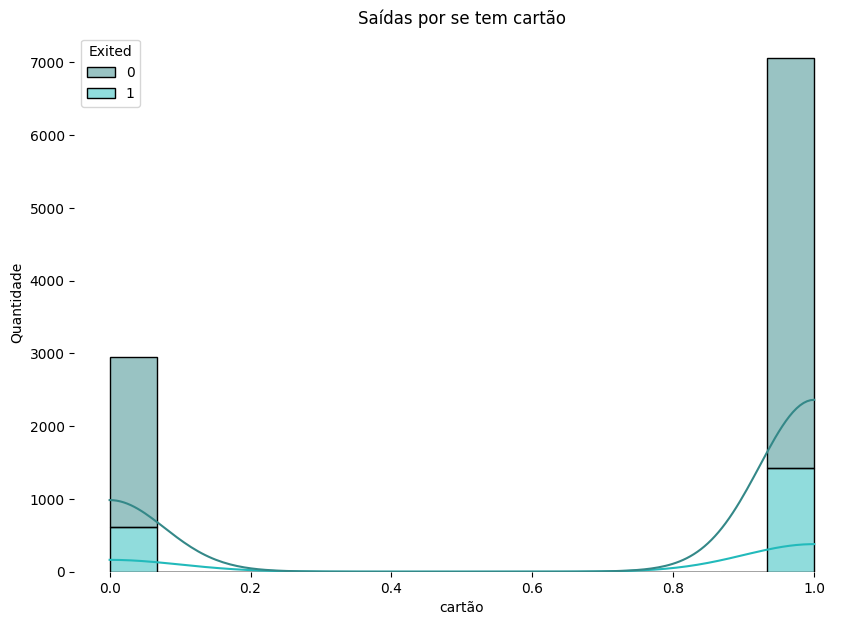

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'HasCrCard', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('cartão')
plt.ylabel('Quantidade')
plt.title('Saídas por se tem cartão')
plt.show()

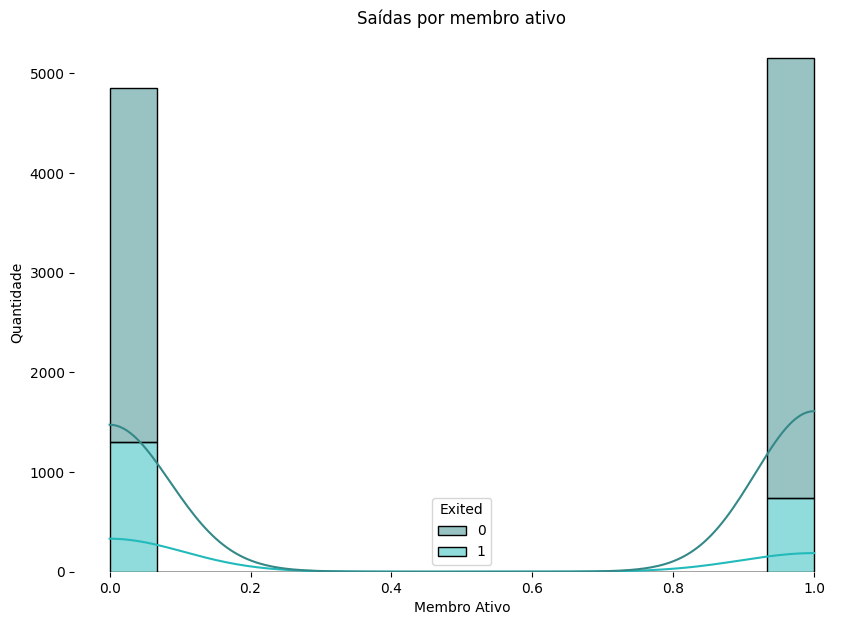

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'IsActiveMember', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Membro Ativo')
plt.ylabel('Quantidade')
plt.title('Saídas por membro ativo')
plt.show()

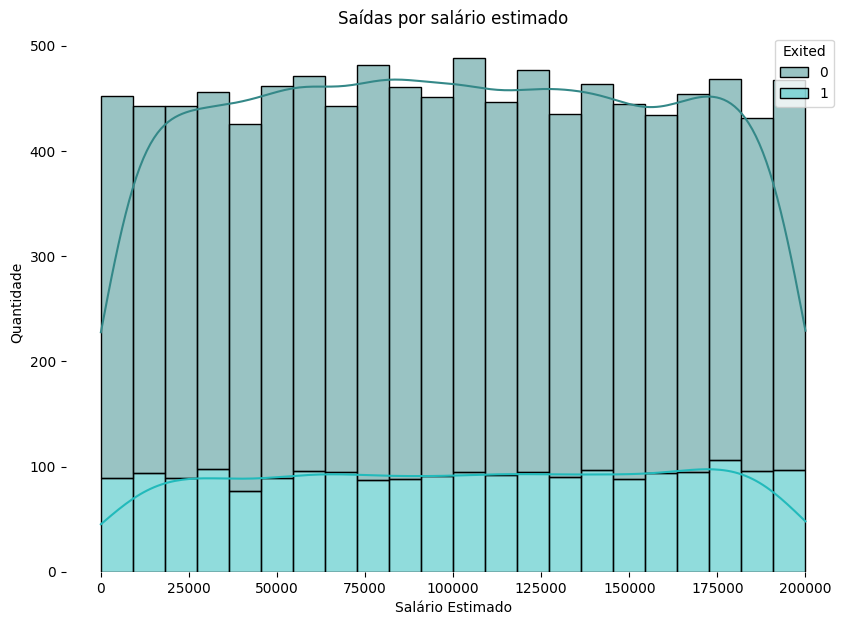

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'EstimatedSalary', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Salário Estimado')
plt.ylabel('Quantidade')
plt.title('Saídas por salário estimado')
plt.show()

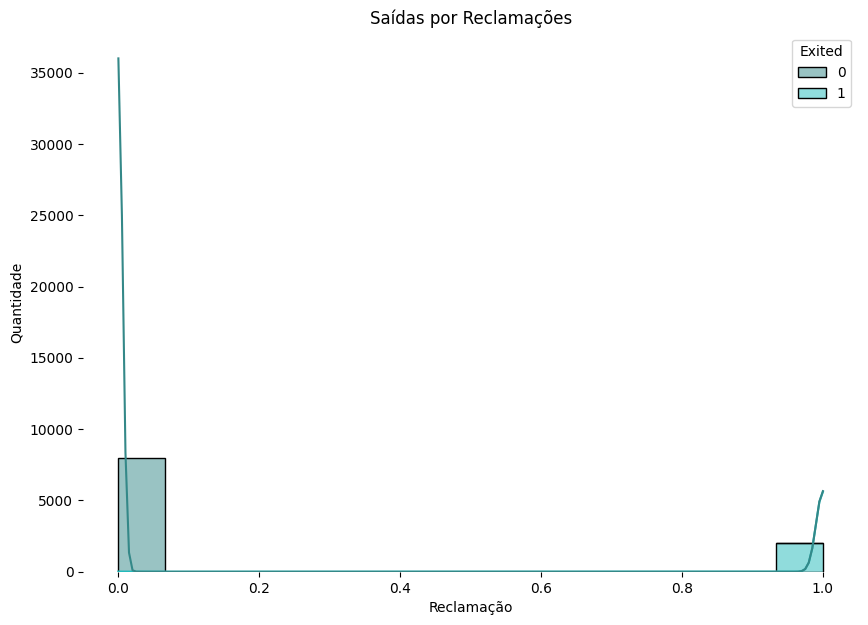

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Complain', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Reclamação')
plt.ylabel('Quantidade')
plt.title('Saídas por Reclamações')
plt.show()

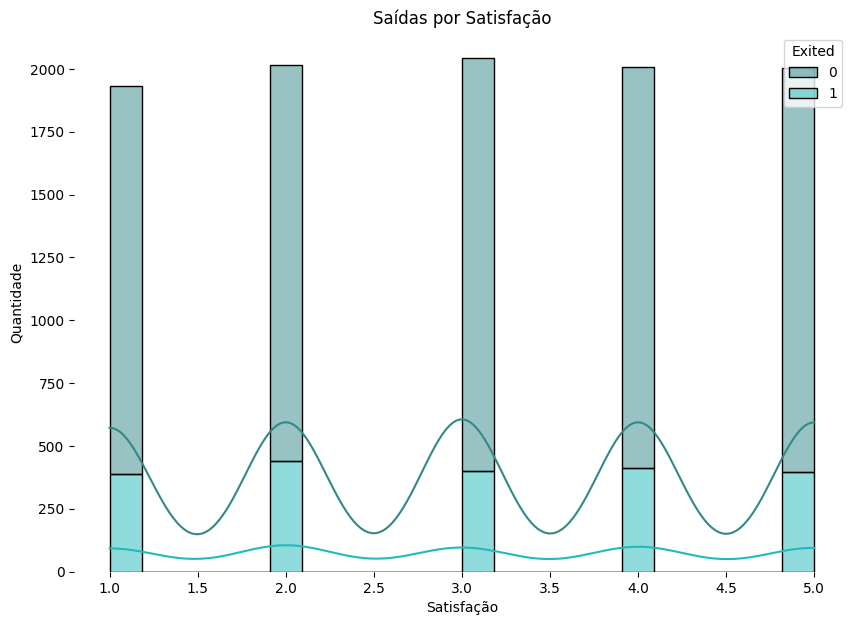

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Satisfaction Score', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Saídas por Satisfação')
plt.show()

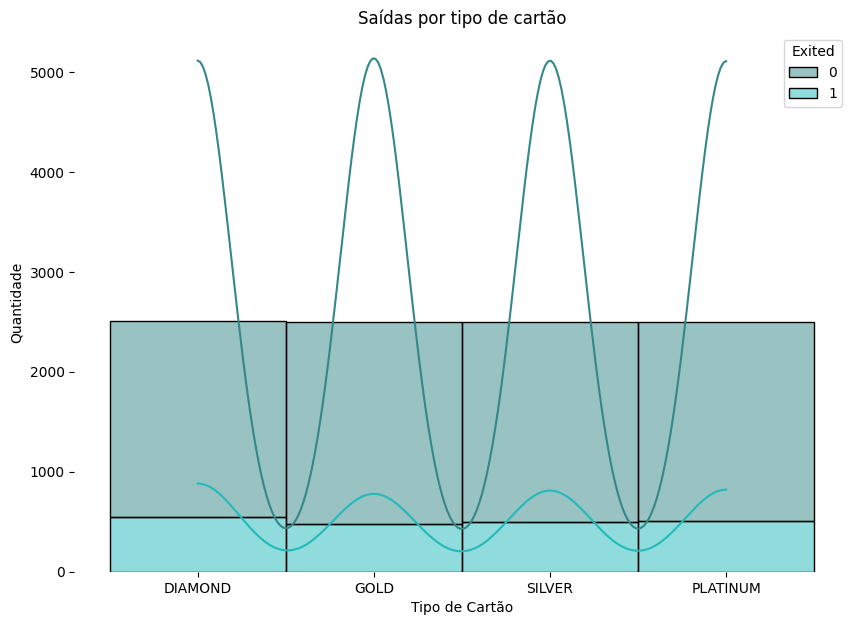

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Card Type', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Tipo de Cartão')
plt.ylabel('Quantidade')
plt.title('Saídas por tipo de cartão')
plt.show()

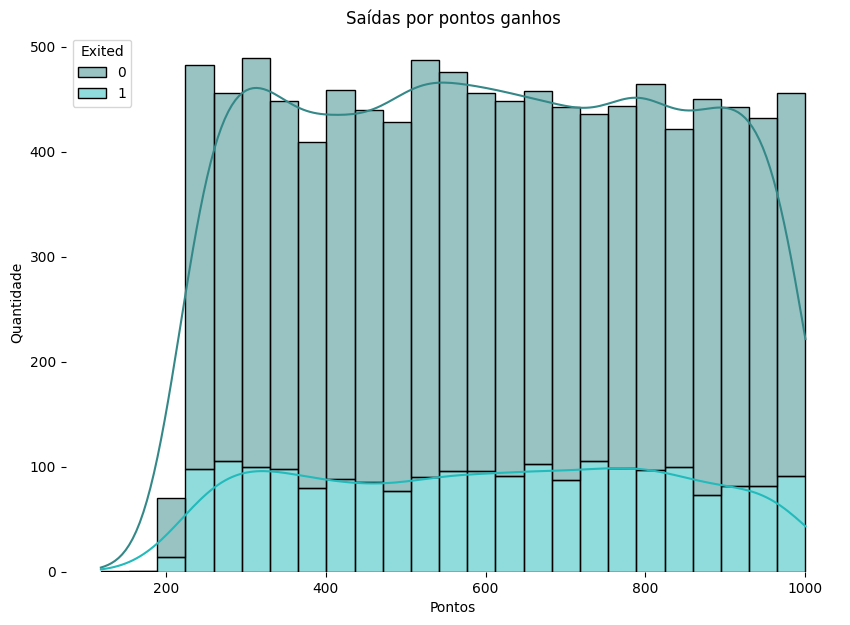

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.histplot (data =  dataset, x = 'Point Earned', hue = 'Exited', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Pontos')
plt.ylabel('Quantidade')
plt.title('Saídas por pontos ganhos')
plt.show()

In [25]:
# APAGANDO VALIÁVEIS IRRELEVANTES 
df = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## CORRELAÇÃO DOS DADOS

In [26]:
# TRANSFORMANDO DOS AS VARIÁVEIS EM VALORES NUMERICOS 

def label_encoder_dataframe(dataset, columns_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for column in columns_to_encode:
        if column in dataset.columns:
            dataset[column] = le.fit_transform(dataset[column])
        else:
            print('A lista possui colunas que não existem no DataFrame.')

    return dataset

colunas_a_codificar = ['Geography', 'Gender', 'Card Type']
label_encoder_dataframe(df, colunas_a_codificar)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [27]:
df.shape

(10000, 15)

<Axes: >

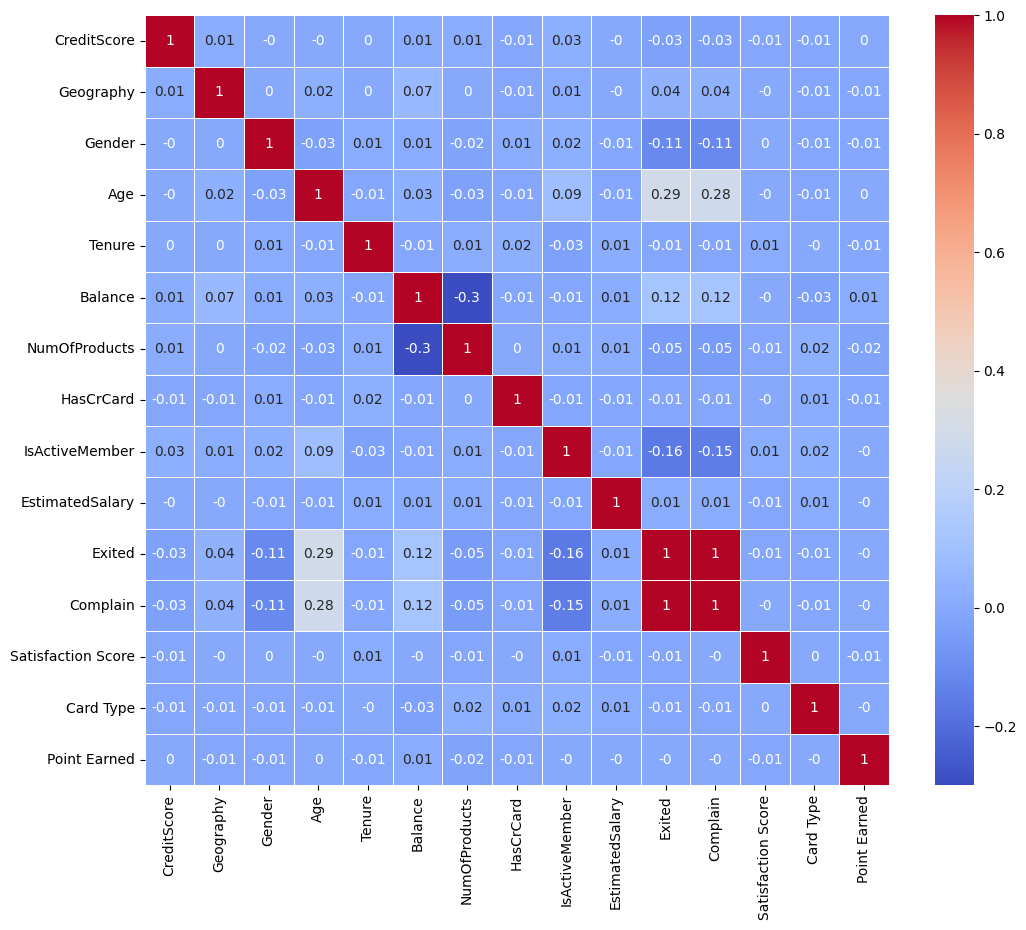

In [28]:
df_corr = df.corr().round(2)
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = df_corr, annot = True, linewidths=.5, ax=ax, cmap='coolwarm' )

- A correlação dos dados está classificada em: **correlação negativa fraca**.
- A correlação positiva perfeita está entre a varável de **Exited** e **Complain**. A variável complain está relacionado se existe ou não reclamação do cliente. 

## SEPARAÇÃO DOS PARA PARA TREINO E TEST

In [29]:
from sklearn.model_selection import train_test_split

x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']]
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)
print(x_train.shape, y_test.shape)

(8000, 14) (2000,)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [31]:
# função para executar os modelos de ML

def roda_modelo(modelo):
    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    modelo.fit(x_train_escalonado, y_train)
    prob_predic = modelo.predict_proba(x_test_escalonado)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    predicao = modelo.predict(x_test_escalonado)
    print("\n Classification Report")
    print(classification_report(y_test, predicao))

    print("\n Roc Curve \n")
    y_pred_probs = modelo.predict_proba(x_test_escalonado)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)

    plt.figure(figsize = (8,6))
    plt.plot(fpr, tpr, color = 'purple', label = f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], color='black', linestyle = '--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de verdadeiro positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    y_pred = (y_pred_probs > 0.5).astype(int)

AUC 0.9992671691792294

 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


 Roc Curve 



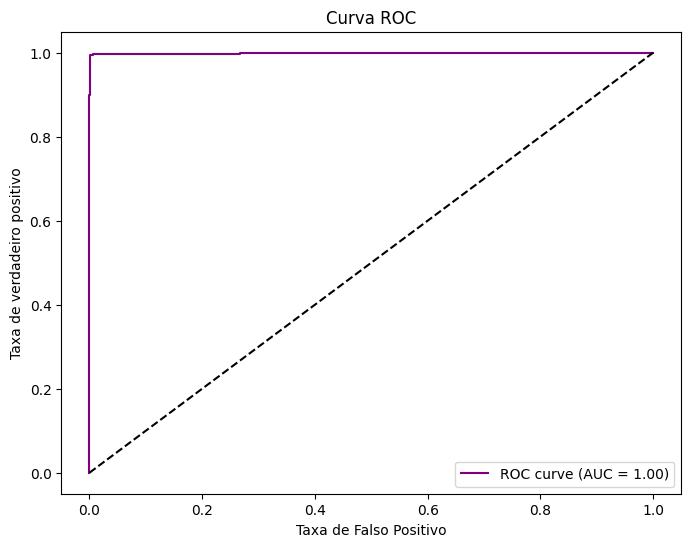

In [32]:
# ÁRVORE DE DECISÃO
from sklearn.ensemble import RandomForestClassifier

modeo_random_florest = RandomForestClassifier(max_depth=7, n_estimators=200)
roda_modelo(modeo_random_florest)

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)
grid_search.fit(x_train_escalonado, y_train)
rf_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", rf_params)

Melhores Hiperparâmetros: {'max_depth': 5, 'n_estimators': 100}


AUC 0.9993356796236083

 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


 Roc Curve 



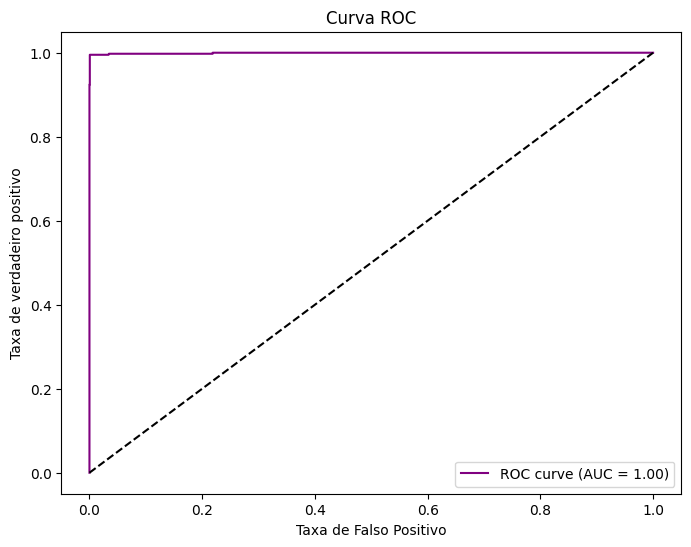

In [34]:
from sklearn.ensemble import RandomForestClassifier
modeo_random_florest_rg = RandomForestClassifier(max_depth=15, n_estimators=300)
roda_modelo(modeo_random_florest_rg)

In [35]:
novos_dados = pd.read_excel('newdata.xlsx')
base_original = pd.read_excel('newdata.xlsx')

#Criando a pipeline
coluna = ['Complain']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modeo_random_florest_rg.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Não sai')
        elif valor == 1:
            resultados.append('Sai')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['Churn'] = mapear_valor(previsoes)
base_original.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,0,848,Sai
1,608,0,0,41,1,83807.86,1,0,1,112542.58,1,0,2,809,Sai
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1,0,0,772,Sai
3,699,0,1,39,1,0.00,2,0,0,93826.63,1,4,0,34,Sai
4,850,0,1,43,2,125510.82,1,1,1,79084.10,1,0,1,993,Sai


In [36]:
round(base_original['Churn'].value_counts(normalize=True)*100,2)

Churn
Não sai    78.34
Sai        21.66
Name: proportion, dtype: float64

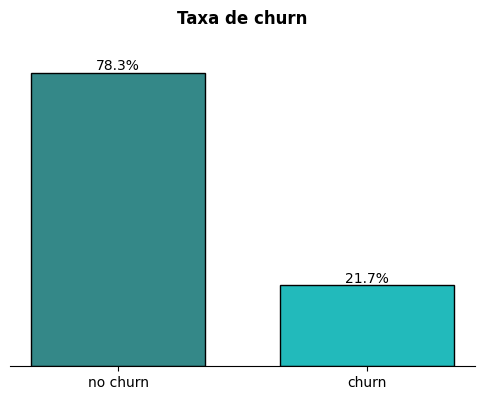

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))

default_grouped = base_original.groupby(['Churn'])[['Churn']].count().rename(columns={'Churn': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

Grafbars = ax.bar(x=default_grouped['Churn'], height=default_grouped['pct'], 
                  color=color_palette, edgecolor = 'black', width=0.7)
for bar, pct in zip(Grafbars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('Taxa de churn', pad=25, fontweight='bold')
ax.set_xticks(ticks=default_grouped['Churn'], labels=['no churn', 'churn'])
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

- Com esses novos dados, foi possível prever que a taxa de churn teve aumento de 
1,3%, saindo de 20,4% para 21,7% de churn. 
- A compreenção da causa de insatisfação vem gerando abandono dos clientes, a
empresa de serviços financeiros precisa realizar uma investigação sobre quais são as 
causas das reclamações realizadas pelos seus clientes. 

**Algumas das reclamações podem estar associadas a:**
1. Atendiamento ao cliente;
2. Altas tarifas e custos; 
3. Competição e oferta de outros bancos; 
4. Inovação e tecnologia; 
5. Problemas de segurança.

- Esses e alguns outros problemas podem está diretamente correlacionado aos motivos 
da saída dos clientes. Identificando quais são esses problemas, medidas mais centralizadas 
podem ser tomada. 